In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
import re
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/annakim/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/annakim/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/annakim/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/annakim/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/annakim/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /Users/annakim/nltk_data...

True

In [ ]:
# Text를 불러서 word 분류
content = open("../Data/Independence.txt").read()
content

'When in the Course of human events, it becomes necessary for one people to dissolve the political bands which have connected them with another, and to assume among the powers of the earth, the separate and equal station to which the Laws of Nature and of Nature\'s God entitle them, a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness. (Note: the original hand-written text ended on the phrase"the pursuit of property" rather than "the pursuit of Happiness" but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today). \nThat to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed. That whenever

In [ ]:
# 불필요한 심벌 없애기
cleaned_content = re.sub(r'[^\.\?\!\w\d\s]', '', content)
cleaned_content

'When in the Course of human events it becomes necessary for one people to dissolve the political bands which have connected them with another and to assume among the powers of the earth the separate and equal station to which the Laws of Nature and of Natures God entitle them a decent respect to the opinions of mankind requires that they should declare the causes which impel them to the separation. \nWe hold these truths to be selfevident that all men are created equal that they are endowed by their Creator with certain unalienable Rights that among these are Life Liberty and the pursuit of Happiness. Note the original handwritten text ended on the phrasethe pursuit of property rather than the pursuit of Happiness but the phrase was changed in subsequent copies in part because it was broader. The latter phrase is used today. \nThat to secure these rights Governments are instituted among Men deriving their just powers from the consent of the governed. That whenever any Form of Governme

In [ ]:
# 대문자를 소문자로 변환
cleaned_content = cleaned_content.lower()
cleaned_content

In [ ]:
# 각각의 워드를 토큰으로 쪼갠다.
word_tokens = nltk.word_tokenize(cleaned_content)
word_tokens

['when',
 'in',
 'the',
 'course',
 'of',
 'human',
 'events',
 'it',
 'becomes',
 'necessary',
 'for',
 'one',
 'people',
 'to',
 'dissolve',
 'the',
 'political',
 'bands',
 'which',
 'have',
 'connected',
 'them',
 'with',
 'another',
 'and',
 'to',
 'assume',
 'among',
 'the',
 'powers',
 'of',
 'the',
 'earth',
 'the',
 'separate',
 'and',
 'equal',
 'station',
 'to',
 'which',
 'the',
 'laws',
 'of',
 'nature',
 'and',
 'of',
 'natures',
 'god',
 'entitle',
 'them',
 'a',
 'decent',
 'respect',
 'to',
 'the',
 'opinions',
 'of',
 'mankind',
 'requires',
 'that',
 'they',
 'should',
 'declare',
 'the',
 'causes',
 'which',
 'impel',
 'them',
 'to',
 'the',
 'separation',
 '.',
 'we',
 'hold',
 'these',
 'truths',
 'to',
 'be',
 'selfevident',
 'that',
 'all',
 'men',
 'are',
 'created',
 'equal',
 'that',
 'they',
 'are',
 'endowed',
 'by',
 'their',
 'creator',
 'with',
 'certain',
 'unalienable',
 'rights',
 'that',
 'among',
 'these',
 'are',
 'life',
 'liberty',
 'and',
 'the'

In [ ]:
# 품사 분리
tokens_pos = nltk.pos_tag(word_tokens)  # 품사 알려줌
print(tokens_pos)

In [ ]:
# 명사만 추출하기
NN_words = []
for word, pos in tokens_pos:
    if 'NN' in pos:
        NN_words.append(word)
        
print(NN_words)

['course', 'events', 'people', 'bands', 'powers', 'earth', 'station', 'laws', 'nature', 'natures', 'respect', 'opinions', 'mankind', 'causes', 'separation', 'truths', 'men', 'creator', 'rights', 'life', 'liberty', 'pursuit', 'happiness', 'text', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copies', 'part', 'phrase', 'today', 'rights', 'governments', 'men', 'powers', 'consent', 'form', 'government', 'becomes', 'ends', 'right', 'people', 'government', 'foundation', 'principles', 'powers', 'form', 'effect', 'safety', 'happiness', 'prudence', 'governments', 'light', 'causes', 'experience', 'mankind', 'evils', 'forms', 'train', 'abuses', 'usurpations', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'guards', 'security', 'sufferance', 'colonies', 'necessity', 'systems', 'government', 'history', 'king', 'britain', 'history', 'injuries', 'usurpations', 'establishment', 'tyranny', 'states', 'let', 'world', 'assent', 'laws', 'good', 'governors', 'laws', 'importan

In [ ]:
# 원형으로 복원(복수형 단수형으로, 불규칙 복수형도 바꿔준다.)

wlem = nltk.WordNetLemmatizer()
lemmatized_words = []
for word in NN_words:
    new_world = wlem.lemmatize(word)
    lemmatized_words.append(new_world)
    
print(lemmatized_words)

In [ ]:
# 불용어 제거 ( the, a, an, is, I, my 와 같은 의미 없는 단어)
stopwords_list = stopwords.words('english')
unique_NN_words = set(lemmatized_words)    #set >> 중복 삭제 
final_NN_words = lemmatized_words


# 불용어 하나 발견하면 전체 다 지운다.
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words:
            final_NN_words.remove(word)

In [ ]:
# 원하는 단어 제거
customized_stopwords = ['be', 'today', 'yesterday', "it's", "don't"]

unique_NN_words1 = set(final_NN_words)


# 불용어 하나 발견하면 전체 다 지운다.
for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words:
            final_NN_words.remove(word)
            
print(final_NN_words)

['course', 'event', 'people', 'band', 'power', 'earth', 'station', 'law', 'nature', 'nature', 'respect', 'opinion', 'mankind', 'cause', 'separation', 'truth', 'men', 'creator', 'right', 'life', 'liberty', 'pursuit', 'happiness', 'text', 'pursuit', 'property', 'pursuit', 'happiness', 'phrase', 'copy', 'part', 'phrase', 'right', 'government', 'men', 'power', 'consent', 'form', 'government', 'becomes', 'end', 'right', 'people', 'government', 'foundation', 'principle', 'power', 'form', 'effect', 'safety', 'happiness', 'prudence', 'government', 'light', 'cause', 'experience', 'mankind', 'evil', 'form', 'train', 'abuse', 'usurpation', 'object', 'design', 'absolute', 'despotism', 'duty', 'government', 'guard', 'security', 'sufferance', 'colony', 'necessity', 'system', 'government', 'history', 'king', 'britain', 'history', 'injury', 'usurpation', 'establishment', 'tyranny', 'state', 'let', 'world', 'assent', 'law', 'good', 'governor', 'law', 'importance', 'operation', 'assent', 'law', 'accommo

In [ ]:
# 빈도 분석
from collections import Counter
c = Counter(final_NN_words)
print(c)

In [ ]:
k = 20
print(c.most_common(k))

[('people', 10), ('law', 9), ('government', 9), ('state', 9), ('power', 8), ('right', 6), ('time', 6), ('form', 4), ('colony', 4), ('assent', 4), ('legislature', 4), ('mankind', 3), ('life', 3), ('pursuit', 3), ('happiness', 3), ('consent', 3), ('usurpation', 3), ('world', 3), ('others', 3), ('justice', 3)]


### WordCloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import wordcloud

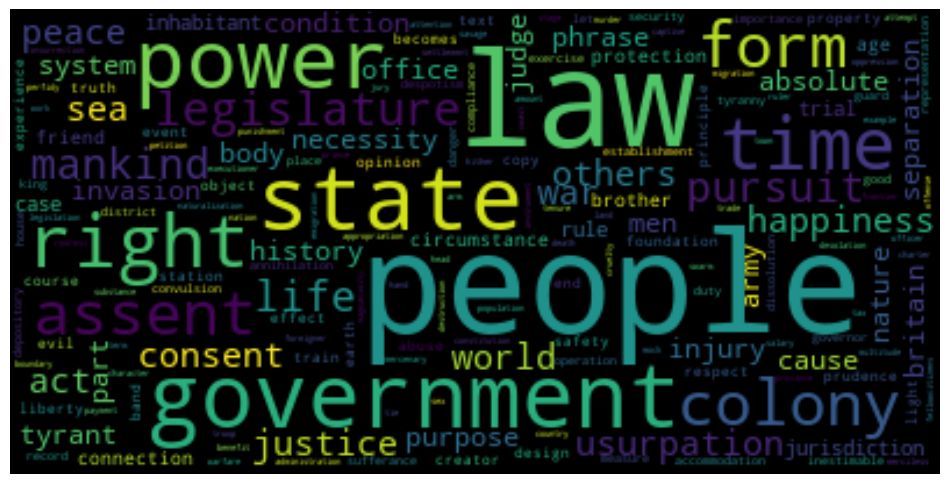

In [ ]:
noun_text = ''
for word in final_NN_words:
    noun_text = noun_text + ' ' + word
wordcloud = WordCloud(
    max_font_size = 60,
    relative_scaling = .5,
).generate(noun_text)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')  # 이미지 
plt.axis('off')
plt.show()